In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\gabri\Downloads\midterm_data.csv")

In [3]:
df

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
...,...,...,...,...,...,...,...,...,...,...
4995,4996,48,8,45.000000,11,25,278.92,0,Tablet,Location 5
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4
4998,4999,58,1,45.000000,11,24,203.42,0,Desktop,Location 5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [5]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [6]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


Text(0.5, 1.0, 'User ID Histogram')

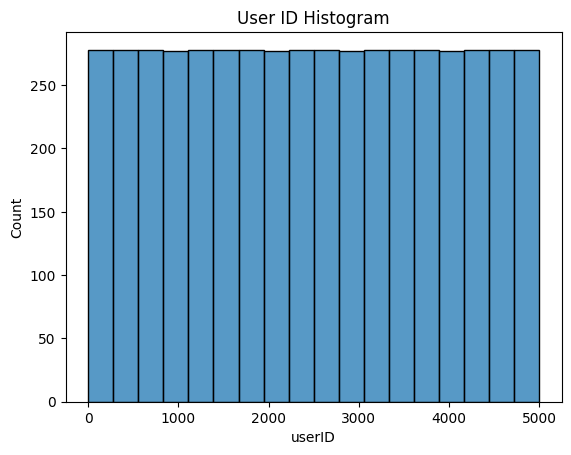

In [10]:
# There are some missing values, however lets first check visualizations for outliers before dealing with them
sns.histplot(df['userID'])
plt.title("User ID Histogram")

Text(0.5, 1.0, 'Age Histogram')

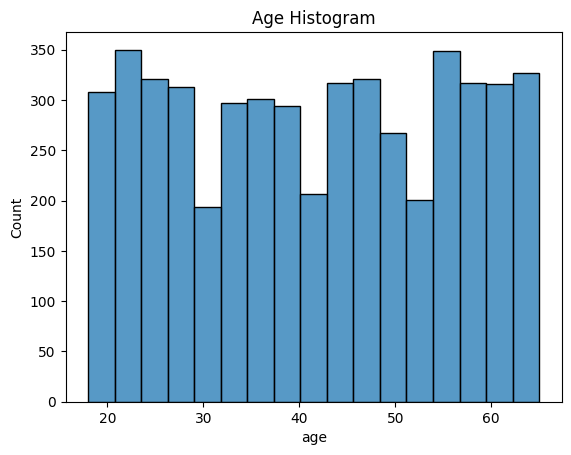

In [11]:
sns.histplot(df['age'])
plt.title("Age Histogram")

Text(0.5, 1.0, 'Sessions Histogram')

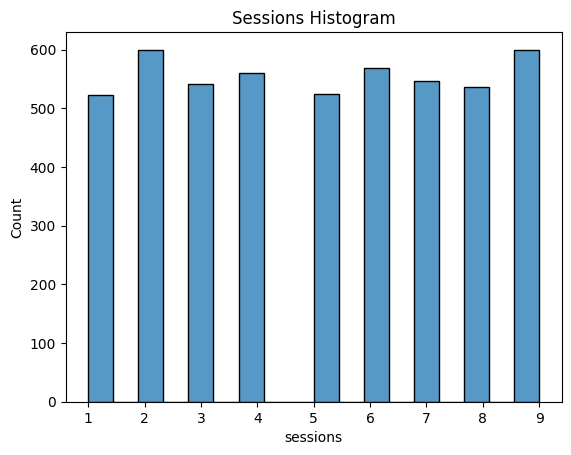

In [12]:
sns.histplot(df['sessions'])
plt.title("Sessions Histogram")

Text(0.5, 1.0, 'Time Spent Histogram')

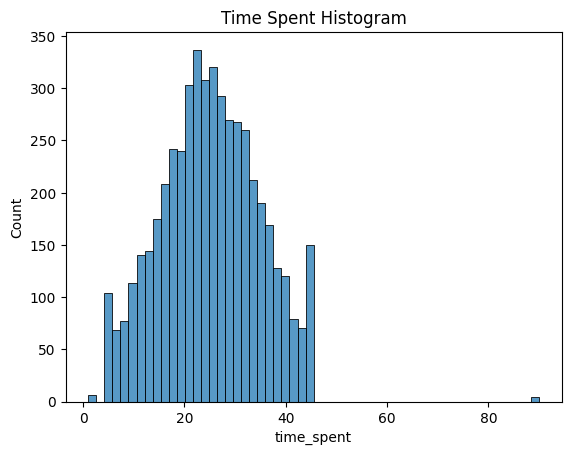

In [13]:
sns.histplot(df['time_spent'])
plt.title("Time Spent Histogram")

Text(0.5, 1.0, 'Pages Visited Histogram')

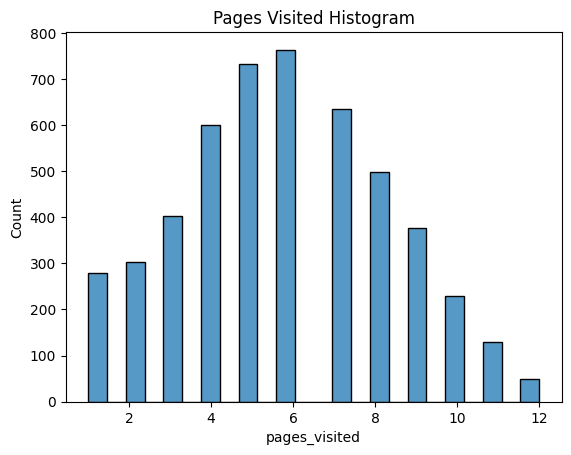

In [15]:
# Appears to be an outlier in time spent, lets make the remaining histograms before confirming and potentially removing it
sns.histplot(df['pages_visited'])
plt.title("Pages Visited Histogram")

Text(0.5, 1.0, 'Cart Items Histogram')

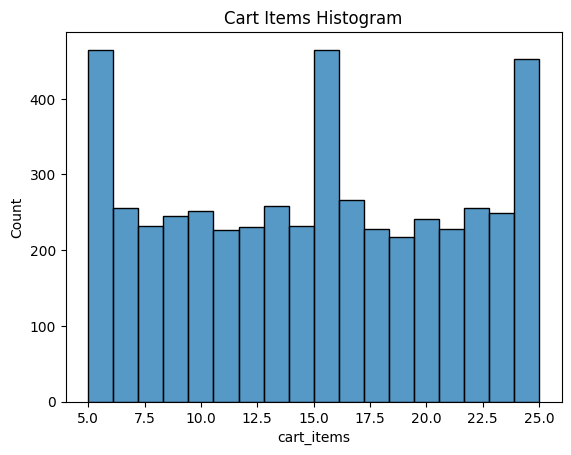

In [16]:
sns.histplot(df['cart_items'])
plt.title("Cart Items Histogram")

Text(0.5, 1.0, 'Cart Value Histogram')

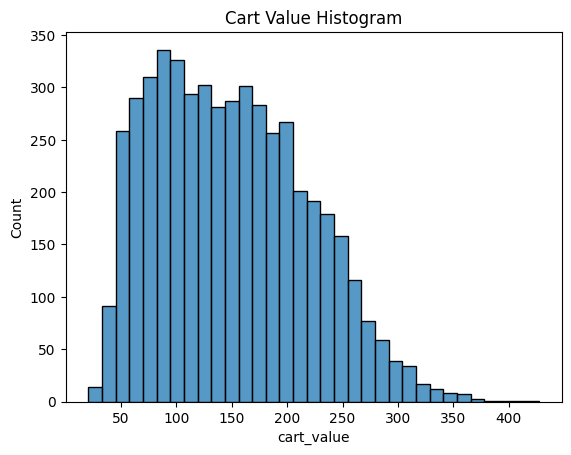

In [17]:
sns.histplot(df['cart_value'])
plt.title("Cart Value Histogram")

Text(0.5, 1.0, 'Checkout Status Histogram')

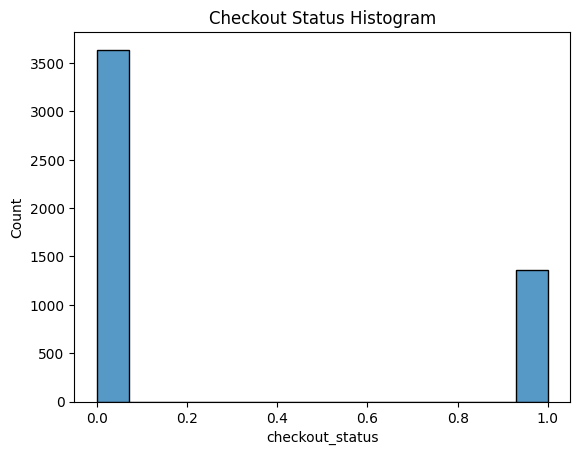

In [18]:
# Potential outliers, but need more information to confirm
sns.histplot(df['checkout_status'])
plt.title("Checkout Status Histogram")


Text(0.5, 1.0, 'Device Histogram')

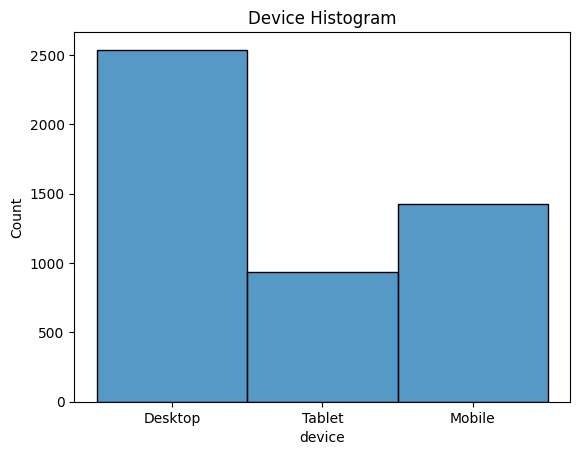

In [19]:
sns.histplot(df['device'])
plt.title("Device Histogram")

Text(0.5, 1.0, 'Location Histogram')

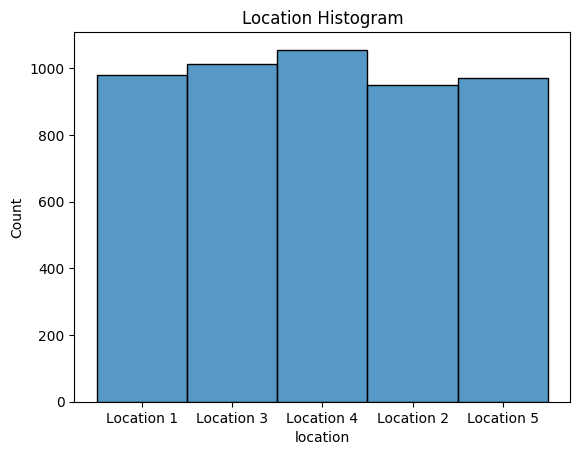

In [20]:
sns.histplot(df['location'])
plt.title("Location Histogram")

Text(0, 0.5, 'Time Spent')

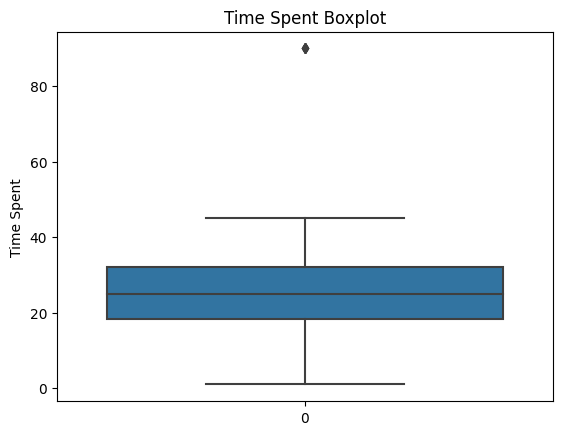

In [21]:
# Now make a boxplot for time spent and cart value to confirm outliers
sns.boxplot(df['time_spent'])
plt.title("Time Spent Boxplot")
plt.ylabel("Time Spent")

Text(0, 0.5, 'Cart Value')

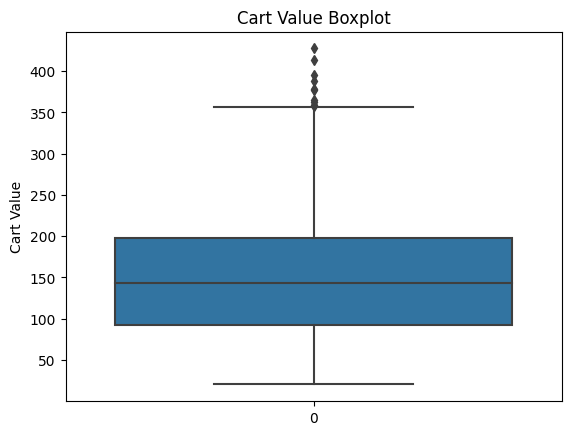

In [22]:
sns.boxplot(df['cart_value'])
plt.title("Cart Value Boxplot")
plt.ylabel("Cart Value")

In [25]:
# Time spent has a very clear outliers while cart value does not, now the outliers need to be removed
df[df['time_spent'] > 60]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
284,285,47,5,90.0,12,14,148.45,0,Desktop,Location 4
2494,2495,28,2,90.0,12,18,151.35,0,Desktop,Location 1
2833,2834,30,8,90.0,12,7,88.32,0,Desktop,Location 1
3957,3958,19,1,90.0,12,20,228.70,0,Desktop,Location 4


In [26]:
df.drop(284, axis=0, inplace=True)
df.drop(2494, axis=0, inplace=True)
df.drop(2833, axis=0, inplace=True)
df.drop(3957, axis=0, inplace=True)

Text(0.5, 1.0, 'Time Spent Histogram')

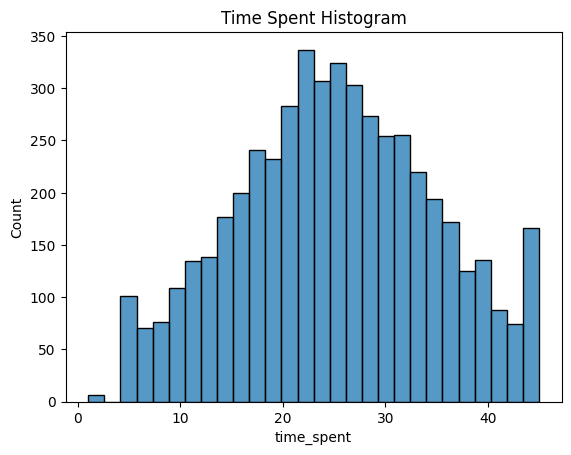

In [27]:
#Check the results
sns.histplot(df['time_spent'])
plt.title("Time Spent Histogram")

Text(0, 0.5, 'Time Spent')

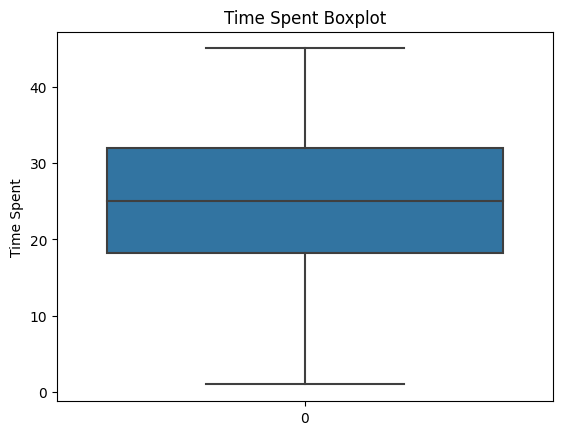

In [28]:
sns.boxplot(df['time_spent'])
plt.title("Time Spent Boxplot")
plt.ylabel("Time Spent")

In [29]:
# Before anything else, lets check if there are any duplicate values
duplicated_values = df.duplicated()

In [30]:
duplicated_values

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 4996, dtype: bool

In [31]:
duplicated_values.info()

<class 'pandas.core.series.Series'>
Index: 4996 entries, 0 to 4999
Series name: None
Non-Null Count  Dtype
--------------  -----
4996 non-null   bool 
dtypes: bool(1)
memory usage: 172.9 KB


In [32]:
duplicated_values.describe(include='all')

count      4996
unique        1
top       False
freq       4996
dtype: object

In [33]:
# From the description, there are no duplicate values to worry about
# Lets check the description of the data again
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4896,4966
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2534,1054
mean,2500.586069,41.546637,5.028022,25.106582,5.769416,14.966573,149.439333,0.272618,NaN,NaN
std,1443.602588,14.042265,2.594677,9.656546,2.565825,6.047119,68.724594,0.445351,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.263008,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.026358,6.000000,15.000000,143.290000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,31.981057,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [35]:
# There are 100 device values and 30 location values missing
# Since both of those variables are categorical, the missing values can either be removed or filled with a unique identifier.
# Lets create a new data frame and compare what happens when those values get fill with unknown (for device) and other (for location).
df_test = df.copy()
df_test.groupby('device').describe()

userID                                                            
          count         mean          std  min      25%     50%      75%   
device                                                                     
Desktop  2534.0  2481.604578  1435.417196  1.0  1260.25  2497.5  3733.75  \
Mobile   1428.0  2518.448880  1457.420581  7.0  1236.75  2512.5  3807.75   
Tablet    934.0  2534.595289  1452.234322  5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status   
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2534.0  41.355170  ...   197.2450  427.40          2534.0  \
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285714  0.451843  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[3 rows x 64 columns]

In [46]:
df_test['device'] = df_test['device'].fillna('Unknown')
df_test.groupby('device')['userID'].describe()

,count,mean,std,min,25%,50%,75%,max
device,,,,,,,,
Desktop,2534.0,2481.604578,1435.417196,1.0,1260.25,2497.5,3733.75,4999.0
Mobile,1428.0,2518.448880,1457.420581,7.0,1236.75,2512.5,3807.75,4991.0
Tablet,934.0,2534.595289,1452.234322,5.0,1271.25,2513.0,3753.25,5000.0
Unknown,100.0,2408.850000,1379.665626,80.0,1232.00,2343.0,3538.25,4988.0


In [47]:
df_test.groupby('device')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
device,,,,,,,,
Desktop,2534.0,41.355170,14.092027,18.0,29.00,41.0,54.0,65.0
Mobile,1428.0,41.724790,13.850712,18.0,30.00,42.0,54.0,65.0
Tablet,934.0,41.844754,14.188990,18.0,29.00,42.0,54.0,65.0
Unknown,100.0,41.070000,14.242670,18.0,28.75,41.0,54.0,65.0


In [48]:
df_test.groupby('device')['sessions'].describe()

,count,mean,std,min,25%,50%,75%,max
device,,,,,,,,
Desktop,2534.0,5.112076,2.577972,1.0,3.0,5.0,7.0,9.0
Mobile,1428.0,4.973389,2.583028,1.0,3.0,5.0,7.0,9.0
Tablet,934.0,4.884368,2.625114,1.0,3.0,5.0,7.0,9.0
Unknown,100.0,5.020000,2.846156,1.0,2.0,5.0,8.0,9.0


In [49]:
df_test.groupby('device')['time_spent'].describe()

,count,mean,std,min,25%,50%,75%,max
device,,,,,,,,
Desktop,2534.0,25.387806,9.712405,1.0,18.585013,25.366142,32.167694,45.0
Mobile,1428.0,24.652176,9.634690,1.0,17.912291,24.328060,31.534705,45.0
Tablet,934.0,25.074234,9.452835,1.0,18.475673,25.060218,31.798240,45.0
Unknown,100.0,24.771395,10.297072,5.0,16.611769,23.233560,33.161891,45.0


In [50]:
df_test.groupby('device')['pages_visited'].describe()

,count,mean,std,min,25%,50%,75%,max
device,,,,,,,,
Desktop,2534.0,5.845699,2.573719,1.0,4.0,6.0,8.0,12.0
Mobile,1428.0,5.668067,2.560093,1.0,4.0,6.0,7.0,12.0
Tablet,934.0,5.726981,2.525620,1.0,4.0,6.0,7.0,12.0
Unknown,100.0,5.680000,2.788432,1.0,4.0,5.5,8.0,12.0


In [51]:
df_test.groupby('device')['cart_items'].describe()

,count,mean,std,min,25%,50%,75%,max
device,,,,,,,,
Desktop,2534.0,14.901736,5.984667,5.0,10.0,15.0,20.0,25.0
Mobile,1428.0,15.132353,6.061816,5.0,10.0,15.0,20.0,25.0
Tablet,934.0,14.910064,6.195151,5.0,9.0,15.0,20.0,25.0
Unknown,100.0,14.770000,6.056727,5.0,9.0,16.0,19.0,25.0


In [52]:
df_test.groupby('device')['cart_value'].describe()

,count,mean,std,min,25%,50%,75%,max
device,,,,,,,,
Desktop,2534.0,149.361677,68.150963,28.11,93.495,143.155,197.2450,427.40
Mobile,1428.0,151.059461,68.707642,20.41,94.665,144.930,201.6100,387.98
Tablet,934.0,147.336199,70.304283,29.79,87.210,140.850,197.7025,377.98
Unknown,100.0,147.915000,68.969607,32.50,88.360,150.220,192.7525,302.48


In [53]:
df_test.groupby('device')['checkout_status'].describe()

,count,mean,std,min,25%,50%,75%,max
device,,,,,,,,
Desktop,2534.0,0.285714,0.451843,0.0,0.0,0.0,1.0,1.0
Mobile,1428.0,0.264706,0.441331,0.0,0.0,0.0,1.0,1.0
Tablet,934.0,0.254818,0.435992,0.0,0.0,0.0,1.0,1.0
Unknown,100.0,0.220000,0.416333,0.0,0.0,0.0,0.0,1.0


In [42]:
df_test_2 = df.copy()
df_test_2.groupby('location').describe()

userID                                                           
             count         mean          std  min      25%     50%     75%   
location                                                                     
Location 1   977.0  2428.406346  1461.875574  1.0  1113.00  2430.0  3686.0  \
Location 2   950.0  2495.070526  1413.792983  4.0  1335.50  2517.0  3674.0   
Location 3  1014.0  2477.388560  1437.144060  2.0  1248.25  2378.5  3712.5   
Location 4  1054.0  2509.366224  1469.449048  3.0  1221.25  2517.5  3791.0   
Location 5   971.0  2598.049434  1434.875326  6.0  1352.50  2664.0  3849.0   

                       age             ... cart_value         checkout_status   
               max   count       mean  ...        75%     max           count   
location                               ...                                      
Location 1  4995.0   977.0  42.318321  ...   200.3800  394.77           977.0  \
Location 2  4997.0   950.0  41.648421  ...   198.9475  357.77           950.0   
Location 3  5000.0  1014.0  41.763314  ...   195.4400  427.40          1014.0   
Location 4  4998.0  1054.0  40.907970  ...   199.5050  353.80          1054.0   
Location 5  4999.0   971.0  41.085479  ...   197.7800  359.00           971.0   

                                                         
                mean       std  min  25%  50%  75%  max  
location                                                 
Location 1  0.283521  0.450938  0.0  0.0  0.0  1.0  1.0  
Location 2  0.266316  0.442264  0.0  0.0  0.0  1.0  1.0  
Location 3  0.261341  0.439582  0.0  0.0  0.0  1.0  1.0  
Location 4  0.284630  0.451452  0.0  0.0  0.0  1.0  1.0  
Location 5  0.266735  0.442481  0.0  0.0  0.0  1.0  1.0  

[5 rows x 64 columns]

In [45]:
df_test_2['location'] = df_test_2['location'].fillna('Other')
df_test_2.groupby('location')['userID'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Location 1,977.0,2428.406346,1461.875574,1.0,1113.00,2430.0,3686.0,4995.0
Location 2,950.0,2495.070526,1413.792983,4.0,1335.50,2517.0,3674.0,4997.0
Location 3,1014.0,2477.388560,1437.144060,2.0,1248.25,2378.5,3712.5,5000.0
Location 4,1054.0,2509.366224,1469.449048,3.0,1221.25,2517.5,3791.0,4998.0
Location 5,971.0,2598.049434,1434.875326,6.0,1352.50,2664.0,3849.0,4999.0
Other,30.0,2346.933333,1288.226445,60.0,1491.50,2295.0,3308.0,4951.0


In [54]:
df_test_2.groupby('location')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Location 1,977.0,42.318321,13.961672,18.0,31.00,42.0,55.0,65.0
Location 2,950.0,41.648421,14.287894,18.0,29.00,42.0,54.0,65.0
Location 3,1014.0,41.763314,13.898276,18.0,29.00,42.0,54.0,65.0
Location 4,1054.0,40.907970,13.921980,18.0,29.00,40.0,53.0,65.0
Location 5,971.0,41.085479,14.155320,18.0,28.50,42.0,54.0,65.0
Other,30.0,43.233333,13.730619,19.0,33.25,42.0,54.5,65.0


In [55]:
df_test_2.groupby('location')['sessions'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Location 1,977.0,4.982600,2.573251,1.0,3.0,5.0,7.00,9.0
Location 2,950.0,4.913684,2.654483,1.0,2.0,5.0,7.00,9.0
Location 3,1014.0,5.019724,2.560541,1.0,3.0,5.0,7.00,9.0
Location 4,1054.0,5.057875,2.580788,1.0,3.0,5.0,7.00,9.0
Location 5,971.0,5.143151,2.608689,1.0,3.0,5.0,7.00,9.0
Other,30.0,5.633333,2.511811,1.0,4.0,6.0,7.75,9.0


In [56]:
df_test_2.groupby('location')['sessions'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Location 1,977.0,4.982600,2.573251,1.0,3.0,5.0,7.00,9.0
Location 2,950.0,4.913684,2.654483,1.0,2.0,5.0,7.00,9.0
Location 3,1014.0,5.019724,2.560541,1.0,3.0,5.0,7.00,9.0
Location 4,1054.0,5.057875,2.580788,1.0,3.0,5.0,7.00,9.0
Location 5,971.0,5.143151,2.608689,1.0,3.0,5.0,7.00,9.0
Other,30.0,5.633333,2.511811,1.0,4.0,6.0,7.75,9.0


In [62]:
df_test_2.groupby('location')['time_spent'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Location 1,977.0,25.536631,9.548978,1.000000,19.024725,25.526627,32.168022,45.0
Location 2,950.0,24.967707,9.702297,5.000000,18.038843,25.070540,32.049984,45.0
Location 3,1014.0,24.867261,9.841365,1.000000,18.029109,24.809668,32.139923,45.0
Location 4,1054.0,25.052708,9.412950,1.000000,18.219371,24.812682,31.873118,45.0
Location 5,971.0,25.148019,9.816699,1.000000,18.583882,24.767063,31.758433,45.0
Other,30.0,24.139582,8.851723,8.551168,17.882223,22.320632,27.962547,45.0


In [63]:
df_test_2.groupby('location')['pages_visited'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Location 1,977.0,5.834186,2.561765,1.0,4.0,6.0,8.0,12.0
Location 2,950.0,5.755789,2.592716,1.0,4.0,6.0,8.0,12.0
Location 3,1014.0,5.698225,2.552442,1.0,4.0,6.0,8.0,12.0
Location 4,1054.0,5.769450,2.529780,1.0,4.0,6.0,7.0,12.0
Location 5,971.0,5.797116,2.599174,1.0,4.0,6.0,7.0,12.0
Other,30.0,5.600000,2.607681,2.0,4.0,5.0,7.0,12.0


In [64]:
df_test_2.groupby('location')['cart_items'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Location 1,977.0,15.191402,5.920512,5.0,10.0,15.0,20.00,25.0
Location 2,950.0,15.026316,6.118805,5.0,10.0,15.0,21.00,25.0
Location 3,1014.0,14.877712,6.083723,5.0,10.0,15.0,20.00,25.0
Location 4,1054.0,14.785579,6.056362,5.0,10.0,15.0,20.00,25.0
Location 5,971.0,14.971164,6.101478,5.0,9.5,15.0,20.00,25.0
Other,30.0,14.966667,4.514218,5.0,13.0,16.0,17.75,24.0


In [65]:
df_test_2.groupby('location')['cart_value'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Location 1,977.0,153.179202,68.999158,29.79,96.0900,151.200,200.3800,394.77
Location 2,950.0,149.254958,69.039490,29.92,92.5025,141.375,198.9475,357.77
Location 3,1014.0,147.610779,69.793360,28.11,92.7125,139.435,195.4400,427.40
Location 4,1054.0,147.676167,68.359952,20.41,89.8000,140.055,199.5050,353.80
Location 5,971.0,149.507662,67.856062,25.84,91.4600,144.810,197.7800,359.00
Other,30.0,155.022333,52.173126,37.24,123.2250,152.855,196.3700,243.39


In [66]:
df_test_2.groupby('location')['checkout_status'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Location 1,977.0,0.283521,0.450938,0.0,0.0,0.0,1.00,1.0
Location 2,950.0,0.266316,0.442264,0.0,0.0,0.0,1.00,1.0
Location 3,1014.0,0.261341,0.439582,0.0,0.0,0.0,1.00,1.0
Location 4,1054.0,0.284630,0.451452,0.0,0.0,0.0,1.00,1.0
Location 5,971.0,0.266735,0.442481,0.0,0.0,0.0,1.00,1.0
Other,30.0,0.266667,0.449776,0.0,0.0,0.0,0.75,1.0


In [67]:
# For device, the values fit inside the range fairly well giving the confidence that they can accept the Unknown label with little bias.
# While the other location variable does not fit as well as the device one, there is not enough difference to feel there will be a major bias in the data.
# Now lets make the changes to the actual data set.
df['device'] = df['device'].fillna("Unknown")
df['location'] = df['location'].fillna("Other")

In [70]:
# Now lets complete the analysis
# Lets perform a t-test for all variables
value1 = df[df['checkout_status'] == 1]['userID']
value2 = df[df['checkout_status'] == 0]['userID']

t_stat, p_val = stats.ttest_ind(value1, value2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -0.9157251962263839
P-value: 0.3598552605791051


In [71]:
value1 = df[df['checkout_status'] == 1]['age']
value2 = df[df['checkout_status'] == 0]['age']

t_stat, p_val = stats.ttest_ind(value1, value2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -0.6798968886129201
P-value: 0.49660126593756404


In [72]:
value1 = df[df['checkout_status'] == 1]['sessions']
value2 = df[df['checkout_status'] == 0]['sessions']

t_stat, p_val = stats.ttest_ind(value1, value2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -1.4225661074003324
P-value: 0.15492443206353704


In [73]:
value1 = df[df['checkout_status'] == 1]['pages_visited']
value2 = df[df['checkout_status'] == 0]['pages_visited']

t_stat, p_val = stats.ttest_ind(value1, value2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 27.47146951327662
P-value: 7.534979639566005e-155


In [74]:
value1 = df[df['checkout_status'] == 1]['cart_items']
value2 = df[df['checkout_status'] == 0]['cart_items']

t_stat, p_val = stats.ttest_ind(value1, value2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -6.076710953091002
P-value: 1.3177377698990114e-09


In [87]:
value1 = df[df['checkout_status'] == 1]['cart_value']
value2 = df[df['checkout_status'] == 0]['cart_value']

t_stat, p_val = stats.ttest_ind(value1, value2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: -5.43996238583549
P-value: 5.583303581527926e-08


In [77]:
# Since cart value is not normally distributed, lets confirm results with a Mann-Whitney U Test
value1 = df[df['checkout_status'] == 1]['cart_value']
value2 = df[df['checkout_status'] == 0]['cart_value']

U_stat, p_val = stats.mannwhitneyu(value1, value2)

print(f"U-statistic: {U_stat}")
print(f"P-value: {p_val}")

U-statistic: 2324531.0
P-value: 0.0009364727427836942


In [90]:
# For device and location, lets do a Chi-squared test since device and location are categorical.
contingency_table = pd.crosstab(df['device'], df['checkout_status'])

chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p_val}")

Chi-squared: 5.531097589432543
P-value: 0.13679042320209317


In [91]:
contingency_table = pd.crosstab(df['location'], df['checkout_status'])

chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p_val}")

Chi-squared: 2.3679725666451295
P-value: 0.7962338903234388


In [78]:
# For device and location, lets make two seperate data sets where people checked out and didn't and compare the results.
did_check_out = df.loc[df['checkout_status'] == 1]
not_check_out = df.loc[df['checkout_status'] == 0]

Text(0.5, 1.0, 'Device Histogram of Checkouts')

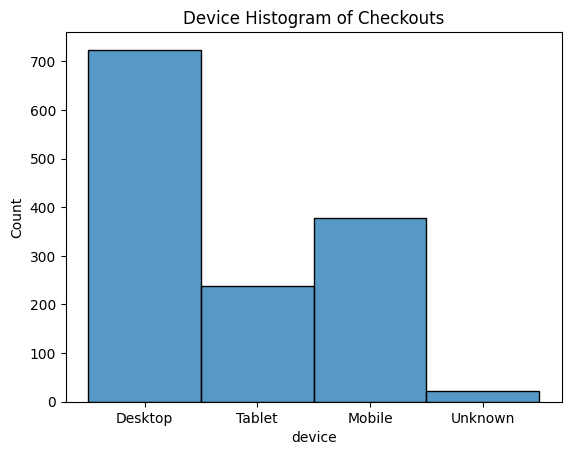

In [80]:
sns.histplot(x='device', data=did_check_out)
plt.title("Device Histogram of Checkouts")

Text(0.5, 1.0, 'Location Histogram of Checkouts')

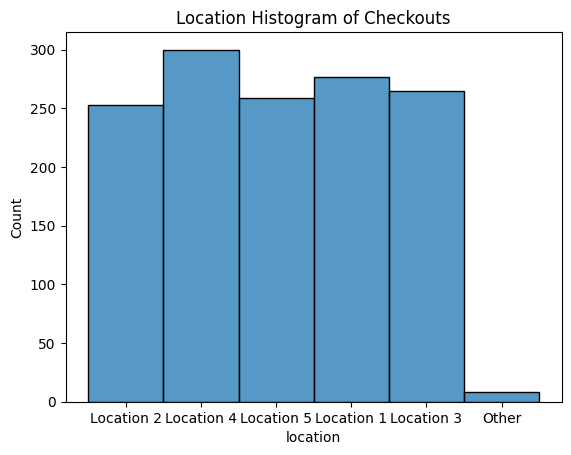

In [81]:
sns.histplot(x='location', data=did_check_out)
plt.title("Location Histogram of Checkouts")

Text(0.5, 1.0, 'Device Histogram of No Checkouts')

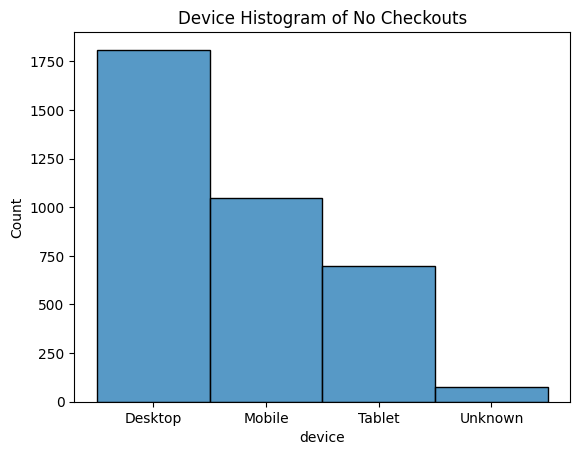

In [82]:
sns.histplot(x='device', data=not_check_out)
plt.title("Device Histogram of No Checkouts")

Text(0.5, 1.0, 'Location Histogram of No Checkouts')

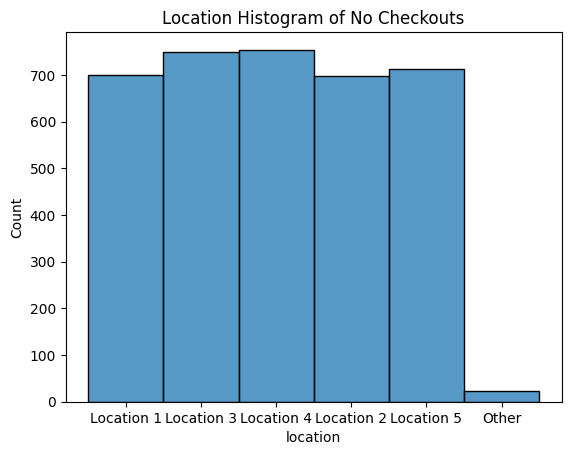

In [83]:
sns.histplot(x='location', data=not_check_out)
plt.title("Location Histogram of No Checkouts")

Question 1

From the statistical analysis performed (the t-tests), there can be no conclusions drawn from the user IDs, age, or sessions columns when comparing who did and did not complete check out. This is because there analysis' p-values were all larger than 0.05, meaning the null hypothosis of both those who complete check out and those who don't being the same can't be discounted. Now the values for the remaining non-categorical variables can conclude something. The analysis indicated that there is a significant correlation between complete check out and pages visited. This means that the more pages visited equals more complete transcations and vice versa. For cart items, it showed a significant correlation between less number of items to complete checkout. This means that the less items in a cart, the more likely the are to complete and vice versa. For cart value, both a t-test and a Mann-Whitney U Test were done, and they both showed a correlation between lower cart value and higher complete check outs. This means the lower the cart value, the more likely there is a complete check out.

Finally, for the categorical variables, two types of analysis was done. First a Chi-squared test was done and second a visualization of both the device and location of who completes transcations and who doesn't was conducted. They both showed (p-values above 0.05 and looking at the graphs) that there is no correlation between the type of device versus completing check out or the location versus completing checkout.

In short what can positively be concluded is the following
- Completing check outs: more page visits, lesser number of cart items, lesser value in the carts
- Not completing check outs: less page visits, more cart items, higher value in the carts

Question 2

The first step in data cleaning was to check each variable for outliers. This is because outliers can mess with the analysis potentially causing false conclusions. It was determined that there were two variables with potential outliers. Since box plots are a better visualization for outliers there were made to confirm outliers. Time spent had four outliers while cart value had none. The outliers were promptly removed.

Next was checking for duplicate values since multiples of the same values can create a bias in the results. There were no duplicates to remove.

After re-checking the description of the data set, it showed that there were missing values. The device variable had 100 missing values and the location variable had 30. Since both of these variables are categorical, the two best ways to deal with them are either to fill in the values with select names or to remove them. Since I feel its better to avoid unnecessary removal of records, filling the values was tested to see if it would work. Two additional data sets were created, one with just filling in the device variable (with Unknown) and one with filling in the location variable (with Other). Once that was done the results along with the other names in the variables were compared to the other variables. This was done to see if the filled in values were significantly different than the non-filled in values for there descriptions (i.e. mean, 25%, 50%, etc.). It was concluded that there was not a significant difference between the filled in values and the non-filled in values, so the missing values for device were filled with Unknown and the missing values for location were filled with Other in the actual data set.

At this point the data cleaning was done, so the analysis was conducted.

C:\Users\gabri\AppData\Local\Temp\ipykernel_29868\626045068.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x='pages_visited', y='age', data=df, ci=0)


Text(0.5, 1.0, 'Pages Visited Versus Age Bar Graph')

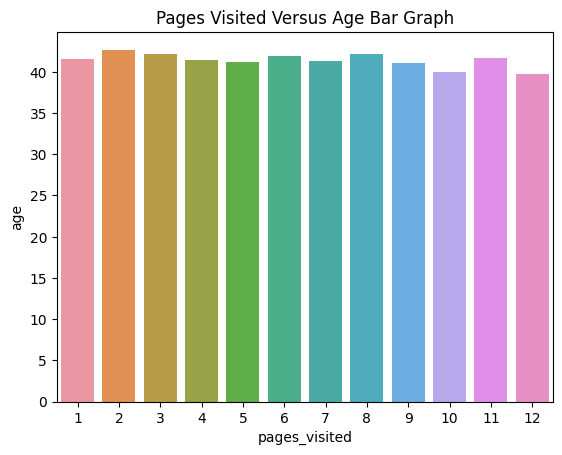

In [92]:
sns.barplot(x='pages_visited', y='age', data=df, ci=0)
plt.title("Pages Visited Versus Age Bar Graph")

C:\Users\gabri\AppData\Local\Temp\ipykernel_29868\1450919296.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x='cart_items', y='age', data=df, ci=0)


Text(0.5, 1.0, 'Cart Items Versus Age Bar Graph')

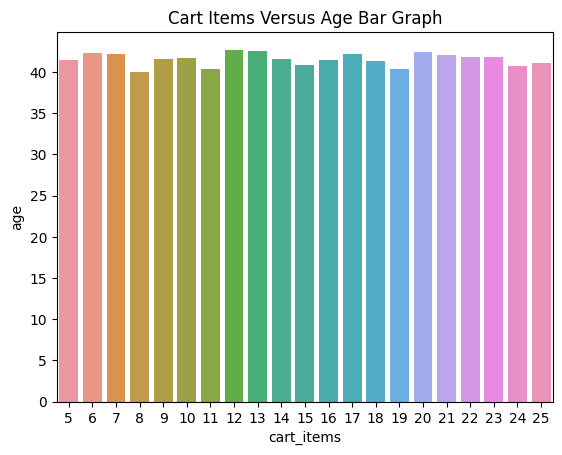

In [93]:
sns.barplot(x='cart_items', y='age', data=df, ci=0)
plt.title("Cart Items Versus Age Bar Graph")

Question 3

To preface this recommendation, I believe there needs to be more information given to confidently inform the best course of action. That being said, its clear the website is not the problem since there is a high correlation between pages visited and completed check outs. However, the more items in a cart and a higher cart value, the less likely customers are to complete the transcation. I would tell the product team to focus more on products of lower value. This is where the majority of our sales are coming from, so it makes the most sense to start discarding high value products in favor of low value ones. Once are attention is one those types of products, I would determine which items specifically are generating the most sale and our overall profit margins are. Based on the analysis above, the direction this business should go in the a business model based and low value items, but sell in bulk. Even though consumer behavior indicates that a high cart value means less likely to complete check out I believe that is a result of customers not wanting to purchase high priced products. If they see our lower valued items are the best on the market, there shoukd be an increase in complete check out versus cart value (through the bulk of the lower priced items).

Based on the graphs above, the current information does not give an age group to target. However once high value products are removed, those trends should look different. Even if they don't at this point I would experiment with some low value products over the course of a couple of weeks, see the results of sales and what age is buying, and keep/remove the product depending on those results. I would repeat the process for all low value products to determine what the best sellers are and to who to give a clear direction of the business. 